# Assignment 4
### Do three of four.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Exercise 1: Contingent Comparisons
- Load the Minnesota use of force data.
- Bootstrap the proportion of missing values for `subject_injury` for each race, and plot the results with grouped KDE and ECDF plots
- Describe what you see. When we consider second order uncertainty, how similar or different are the sampling distributions of these proportions? 

In [4]:
data = pd.read_csv(r"C:\Users\crush\OneDrive\Desktop\DS 5030\assignment1\data\mn_police_use_of_force.csv")
data.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [ ]:
data["inj_na"] = data["subject_injury"].isna()

pd.crosstab(data["inj_na"], data["race"], normalize='columns')

race,Asian,Black,Native American,Other / Mixed Race,Pacific Islander,White
inj_na,,,,,,
False,0.364341,0.240847,0.280612,0.590244,0.0,0.246405
True,0.635659,0.759153,0.719388,0.409756,1.0,0.753595


In [ ]:
# boostrapping with 1500 samples

samples = 1500
estimate = pd.concat(
    [data.sample(frac=1, replace=True)
    .groupby("race")["inj_na"].mean()
    for _ in range(samples)], axis=1).T

C:\Users\crush\AppData\Local\Temp\ipykernel_35080\3951777187.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(estimate)


<Axes: ylabel='Density'>

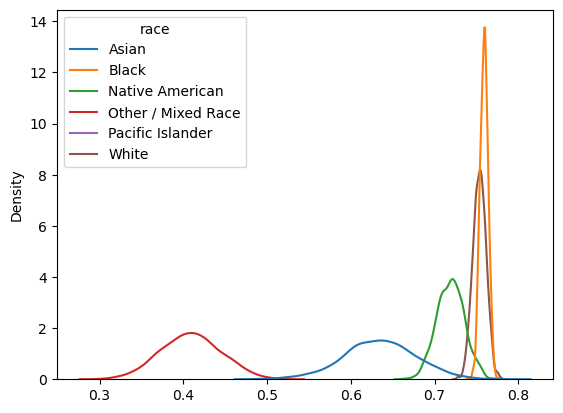

In [14]:
# kde plot

sns.kdeplot(estimate)

<Axes: ylabel='Proportion'>

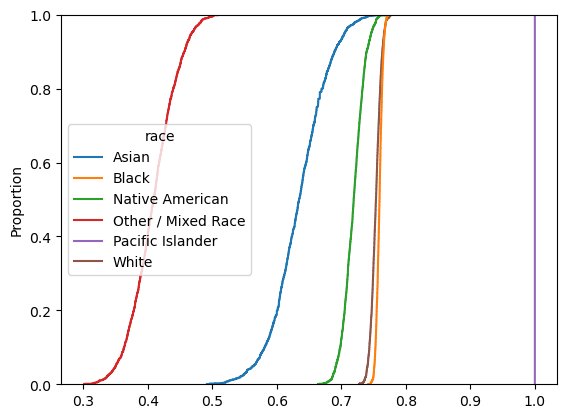

In [ ]:
# ecdf plot

sns.ecdfplot(estimate)

In [15]:
data["race"].value_counts()

race
Black                 7648
White                 3129
Native American        784
Other / Mixed Race     205
Asian                  129
Pacific Islander         6
Name: count, dtype: int64

**Answer:** Overall, the number of missing values for the subject_injury variable is common across all races, particularly for the following racial groups: White, Black, and Native American. According to first order uncertainty, these racial groups all have missing values for around three-quarters of the observations. For the "Other/Mixed Race" category, the missing value is significantly lower at 41%. Once I bootstrapped this category to see how much the variable moves, it became clear that we are less certain about missing values for Asian and Other/Mixed Race groups. On the other hand, we are very certain that for both the Black and White groups, the proportion of missing values is around 75%. This is likely due to the fact that Black and White make up the vast majority of the dataset, and with more observations comes more certainty. Meanwhile, for the Asian and Other/Mixed Race categories, the number of observations is significantly lower, which leads to greater uncertainty. This theory that more observations lead to greater certainty around missing values is supported by the KDE plot, where the racial categories have vastly different types of curves. The Pacific Islander category is likely an outlier since there are only 6 observations in the entire dataset. When we consider second-order uncertainty, the distributions are very similar to the distributions before I boostrapped.


### Exercise 2: Invitation to Inference
- Run the simulation code line by line and comment what each line is doing, or write your own code to do the resampling
- Open the NHANES or Ames prices or College Completion data. Pick a variable and a statistic to compute (e.g. mean, median, variance, IQR)
- Use the `simulate` function from class to get a sample of estimates for your statistic and your data
- Create a new function, `interval(L,H,estimates)`, that computes the $L$-th and $H$-th quantiles for your estimates, $H>L$
- If $L=.05$ and $H=.95$, this is a **90-percent confidence interval**: "For our statistic, this interval captures the true value of the population parameter 90 percent of the time. (We are 90% **confident** that it includes the true value of the parameter, but the probability that the true parameter lies in this interval is 0 or 1.)"
- We will spend much more time on this later in class, but for people who have done hypothesis testing before, you now know how to do it directly from the data: No central limit theorem required.

In [29]:
data = pd.read_csv(r"C:\Users\crush\OneDrive\Desktop\DS 5030\assignment1\data\nhanes_data_17_18.csv")

C:\Users\crush\AppData\Local\Temp\ipykernel_35080\920940444.py:1: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\crush\OneDrive\Desktop\DS 5030\assignment1\data\nhanes_data_17_18.csv")


In [ ]:
def bootstrap_mean(data, column, samples=2500):
    estimate = [data.sample(frac=1, replace=True)[column].mean() for _ in range(samples)] # one line of code that calculates the mean after resampling (default is 2500 times)
    return estimate

In [30]:
# variable = AnnualFamilyIncome, metric = mean

estimate = bootstrap_mean(data, "AnnualFamilyIncome", samples=2000)

In [ ]:
# interval function

def interval(L, H, estimates):
    L_quantile = np.round(np.quantile(estimates, L), 2)
    H_quantile = np.round(np.quantile(estimates, H), 2)
    print(f"Lower Bound: ${L_quantile}, Upper Bound: ${H_quantile}")
    return L_quantile, H_quantile


Lower Bound: $51285.91, Upper Bound: $52587.87


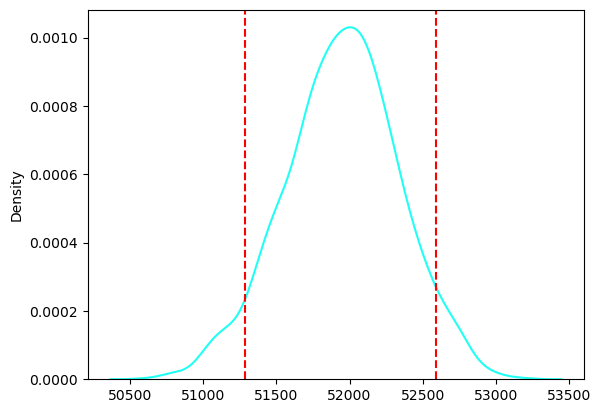

In [ ]:
# graph

L_quantile, H_quantile = interval(0.05, 0.95, estimate)

sns.kdeplot(estimate, color= "#21FFF4")
plt.axvline(x = L_quantile, color = "red", linestyle = '--')
plt.axvline(x = H_quantile, color = "red", linestyle = '--')
plt.show()

### Exercise 3: Intro to A/B Testing
- Go here, and read about this study: https://www.clinicaltrials.gov/study/NCT01985360
- Read the Study Overview and explain what the goal of the trial is 
- Read the Study Plan and explain how it was designed and why -- there's lots of medical jargon, but the main point is how patients were assigned to interventions. 
- Read the Results Posted: Go to **Outcome Measures**. Explain how table 1 ("Incidence of Death from Any Cause or Myocardial Infarction") is a contingency table. These are the data for this exercise.
- What is the difference in surival rates between the invasive strategy and the conservative strategy?
- Bootstrap the survival rates for the two groups, and plot them as KDEs and ECDFs against one another
- Bootstrap the difference in surival rates, and plot it as a KDE and ECDF
- Is this an effective health intervention? Explain your answer clearly

This would be what CS people call **A/B testing** and everyone else called a **randomized controlled trial**: Using randomized assignment to detect the difference in outcomes between two groups. (We've just done a non-parametric version of a two-sample t-test.)

**Goal:** The goal of this trial is to test if early invasive treatment lower death or heart attack rates compared to conservative management in patients with heart disease.

**Study Plan:** Patients with heart disease were randomly assigned to either an invasive procedure or a conservative procedure. This avoids bias and allows a fair test of whether invasive treament provides added benefit.

**Outcome Measures:** This table is a contigency table because it allows direct comparison of outcome frequencies across interventions.

**Survival Rates:** There's about a 1 percentage point increase in survival in the invasive group.

        Invasive Group: 68% survival (123/388)

        Conservative Group: 67% survival (129/389)

**Effectiveness:** Bootstrapping reveals that there is a very small difference in survival rates, meaning the invasive treatment is probably not better than the conservative treatment. However, the study reported that some symptoms of heart disease are relieved by the invasive treatment which could be beneficial to some patients.







In [20]:
# replicating the study counts

df_con = pd.DataFrame({
    "arm": "conservative",
    "outcome": np.repeat([0, 1], [129, 389-129])
})

df_inv = pd.DataFrame({
    "arm": "invasive",
    "outcome": np.repeat([0, 1], [123, 388-123])
})

# bootsrapping with 2500 samples

conservative_bs = bootstrap_mean(df_con, "outcome", samples=2500)
invasive_bs = bootstrap_mean(df_inv, "outcome", samples=2500)

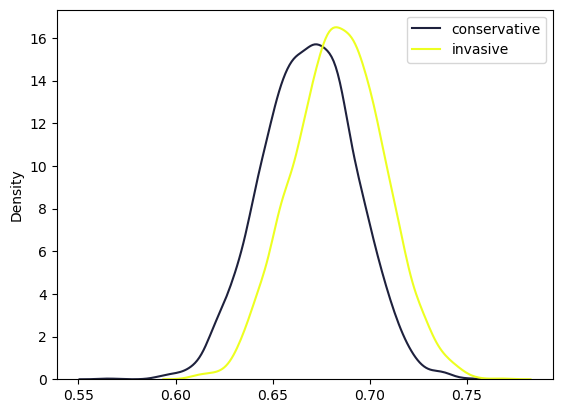

In [23]:
# kde plot

sns.kdeplot(conservative_bs, label="conservative", color = "#1E213D")
sns.kdeplot(invasive_bs, label="invasive", color= '#EDFF21')
plt.legend()
plt.show()

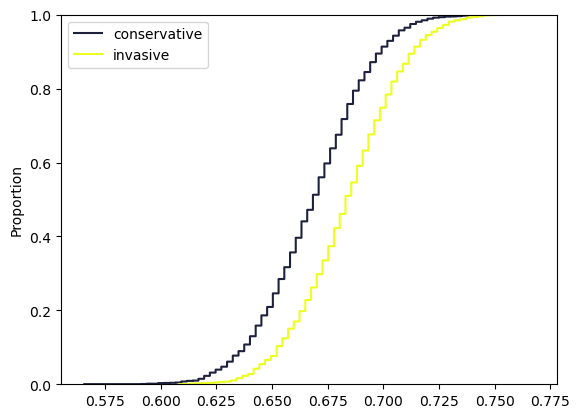

In [24]:
# ecdf plot

sns.ecdfplot(conservative_bs, label="conservative", color = "#1E213D")
sns.ecdfplot(invasive_bs, label="invasive", color= '#EDFF21')
plt.legend()
plt.show()

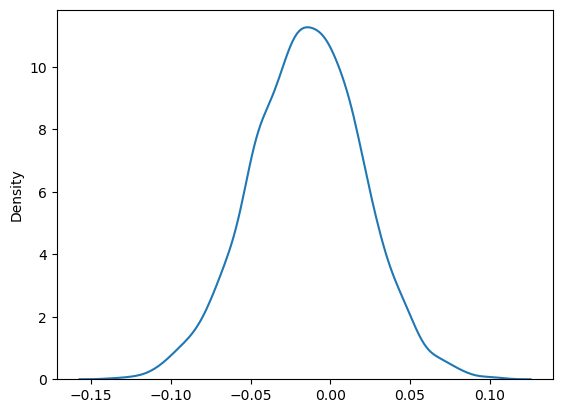

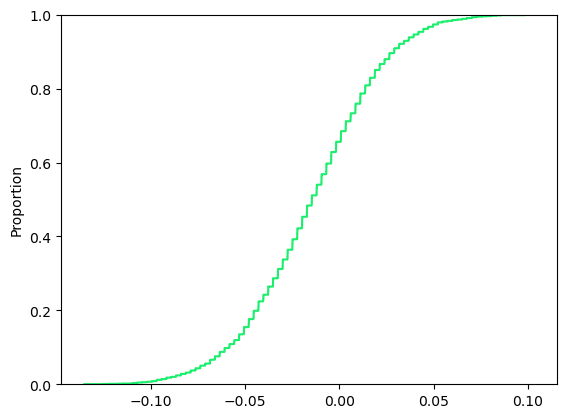

In [28]:
def bootstrap_difference(df1, df2, column, samples=2500):
    diffs = []
    for _ in range(samples):
        mean1 = df1.sample(frac=1, replace=True)[column].mean()
        mean2 = df2.sample(frac=1, replace=True)[column].mean()
        diffs.append(mean1 - mean2)
    return pd.Series(diffs)


difference = bootstrap_difference(df_con, df_inv, "outcome", samples=2500)

# kde plot

sns.kdeplot(difference)
plt.show()

# ecdf plot

sns.ecdfplot(difference, color= "#1CEF6D")
plt.show()

### Exercise 4: Prediction Uncertainty
- Pick a dataset and two continuous variables.
- Recall the LCLS estimator:
$$
\hat{y}(z) =  \frac{ \frac{1}{N} \sum_{i=1}^N y_i \times \frac{1}{h}k\left( \frac{z - x_i}{h} \right)}{ \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k\left( \frac{z - x_i}{h} \right)}
$$
with the Epanechnikov kernel and the standard plug-in bandwidth for $h$
- Compute and plot this line for 30 bootstrap samples. Notice where there is a lot of variation in the predictions, versus little variation in the predictions.
- Now, for any $z$, we can bootstrap a distribution of predictions using the above formula. Do this at the 25th percentile, median, and 75th percentile of $X$, and make KDE plots of your results.
- Now, pick a grid for $z$: Obvious choices are all of the unique values in the data, or an equally spaced grid from the minimum value to the maximum value. For each $z$, bootstrap a sample of predictions and compute the .05 and .95 quantiles. Plot these error curves along with your LCLS estimate. Where are your predictions "tight"/reliable? Where are they highly variable/unreliable?